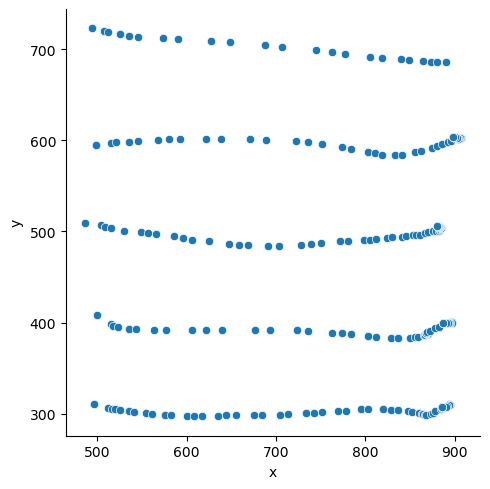

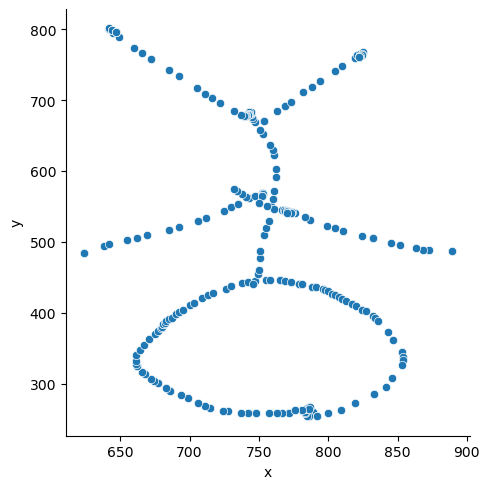

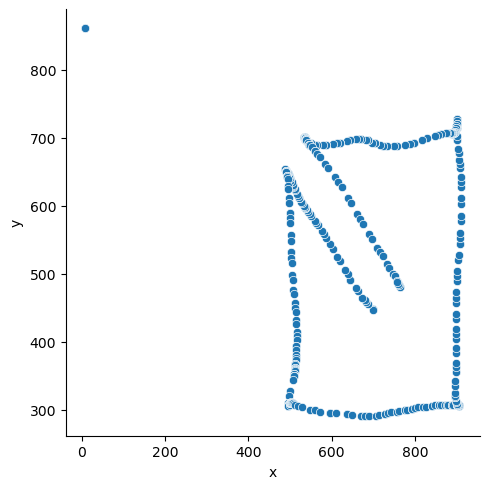

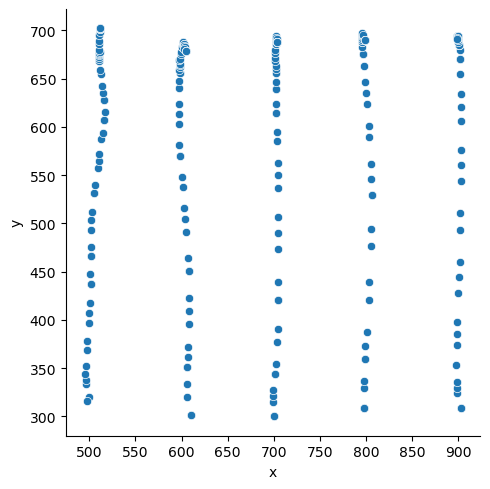

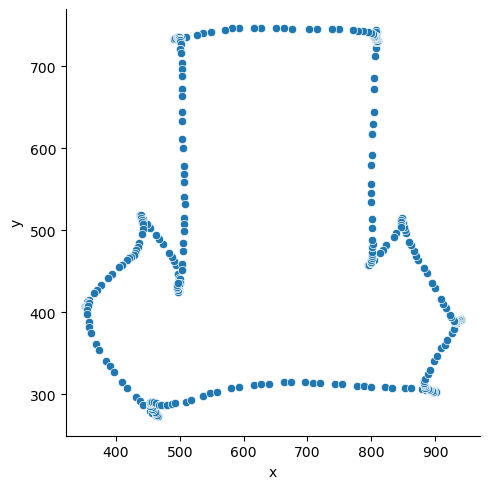

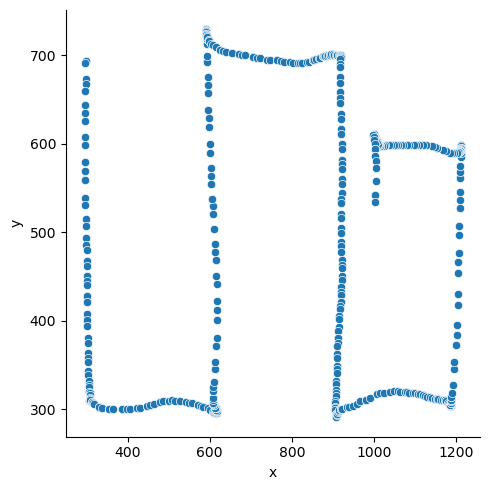

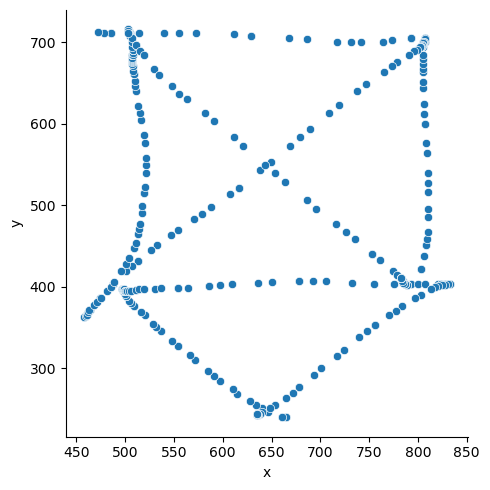

In [6]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('Versuchdaten_vorverarbeitet/1/Real.csv')
pictures = df.groupby('sublevel')

pic_dataframes = []

for group_value, group_data in pictures:
  pic_dataframes = []
  pic_dataframes.append(group_data.copy())
  pic_df = pd.concat(pic_dataframes, ignore_index=True)

  # Punktplot erstellen
  sns.relplot(data=pic_df, x='x', y='y')
